In [1092]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [1093]:
df = pd.read_csv('logistic_regression.txt')

<b>Data dictionary</b>:

<b>loan_amnt</b> : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  

<b>term</b> : The number of payments on the loan. Values are in months and can be either 36 or 60.  

<b>int_rate</b> : Interest Rate on the loan  

<b>installment</b> : The monthly payment owed by the borrower if the loan originates.  

<b>grade</b> : LoanTap assigned loan grade  

<b>sub_grade</b> : LoanTap assigned loan subgrade  

<b>emp_title</b> :The job title supplied by the Borrower when applying for the loan.  

<b>emp_length</b> : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.  

<b>home_ownership</b> : The home ownership status provided by the borrower during registration or obtained from the credit report.  

<b>annual_inc</b> : The self-reported annual income provided by the borrower during registration.  

<b>verification_status</b> : Indicates if income was verified by LoanTap, not verified, or if the income source was verified  

<b>issue_d</b> : The month which the loan was funded  

<b>loan_status</b> : Current status of the loan - Target Variable  

<b>purpose</b> : A category provided by the borrower for the loan request.

<b>title</b> : The loan title provided by the borrower

<b>dti</b> : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

<b>earliest_cr_line</b> :The month the borrower's earliest reported credit line was opened

<b>open_acc</b> : The number of open credit lines in the borrower's credit file.

<b>pub_rec</b> : Number of derogatory public records

<b>revol_bal</b> : Total credit revolving balance

<b>revol_util</b> : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

<b>total_acc</b> : The total number of credit lines currently in the borrower's credit file

<b>initial_list_status</b> : The initial listing status of the loan. Possible values are – W, F

<b>application_type</b> : Indicates whether the loan is an individual application or a joint application with two co-borrowers

<b>mort_acc</b> : Number of mortgage accounts.

<b>pub_rec_bankruptcies</b> : Number of public record bankruptcies

<b>Address: Address</b> of the individual

In [1094]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [1095]:
df.shape

(396030, 27)

In [1096]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [1097]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [1098]:
df.describe(exclude=np.number).T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


In [1099]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

#### Train-validation-test split to avoid data leakage

In [1100]:
from sklearn.model_selection import train_test_split

In [1101]:
# Defining x and y variables
x = df.drop('loan_status', axis = 1)
y = df['loan_status']

In [1102]:
# Splitting test data from original data set
x_traincv, x_test, y_traincv, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Splitting validation data from train data set
x_train, x_val, y_train, y_val = train_test_split(x_traincv, y_traincv, test_size=0.25, random_state=42)

In [1103]:
#Lets combine x and y for now to do EDA
x_train['loan_status'] = y_train.values
x_test['loan_status'] = y_test.values
x_val['loan_status'] = y_val.values

### EDA and Feature engineering

In [1104]:
#Lets combine x_train and y_train for now to do EDA
x_train['loan_status'] = y_train.values

In [1105]:
x_train.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status
249928,7200.0,36 months,17.57,258.75,D,D4,Accounts Payable Specialist,< 1 year,MORTGAGE,28800.0,...,1.0,2759.0,35.8,16.0,w,INDIVIDUAL,2.0,1.0,"1349 Parker Street\r\nRandolphside, SD 29597",Fully Paid
279578,10000.0,36 months,11.99,332.10,B,B5,Teacher,10+ years,MORTGAGE,56000.0,...,0.0,13838.0,76.0,31.0,f,INDIVIDUAL,0.0,0.0,"22542 Micheal Island Suite 019\r\nTuckermouth,...",Charged Off
163928,14000.0,36 months,6.62,429.86,A,A2,McKinney ISD,10+ years,MORTGAGE,50000.0,...,0.0,6474.0,8.5,40.0,f,INDIVIDUAL,3.0,0.0,"957 Angela Squares\r\nStevenmouth, OR 30723",Fully Paid


In [1106]:
x_train['address'] = x_train['address'].apply(lambda x : x[-8:-6])

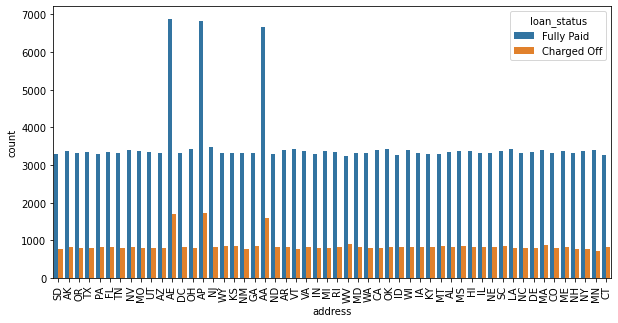

In [1107]:
plt.figure(figsize=(10,5))
sns.countplot(x_train['address'], hue = x_train['loan_status'])
plt.xticks(rotation = '90')
plt.show()

In [1108]:
#dropping address column as it has almost no effect with the target variable.
x_train.drop('address', axis = 1,inplace=True)
x_val.drop('address', axis = 1,inplace=True)
x_test.drop('address', axis = 1,inplace=True)

#### Univariate analyis

In [1109]:
cont_features = x_train.describe().columns
cont_features

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [1110]:
# Deleting 'pub_rec_bankruptcies', 'mort_acc',  'pub_rec' from cont_features as they appear to be categorical
cont_features = np.delete(cont_features, [-1,-2,-6])
cont_features

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

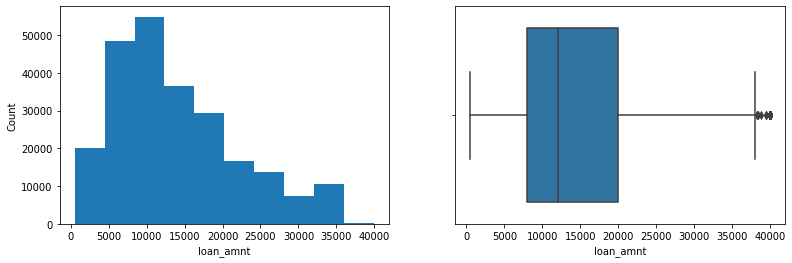

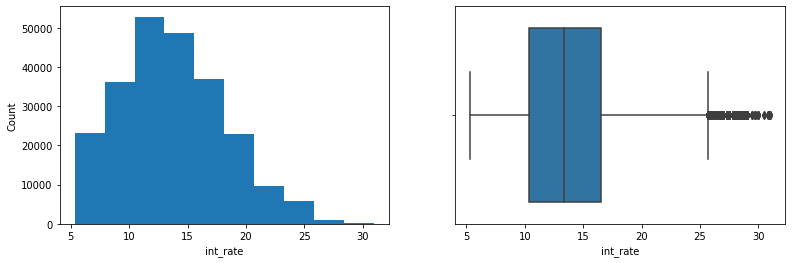

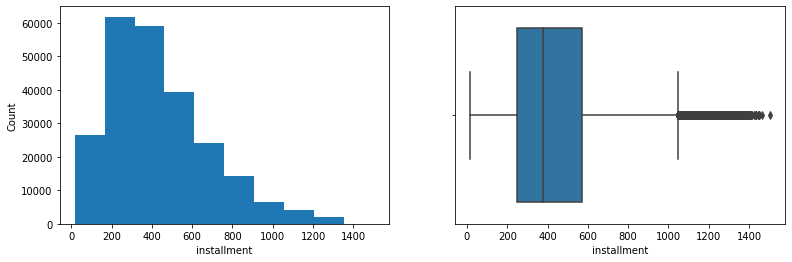

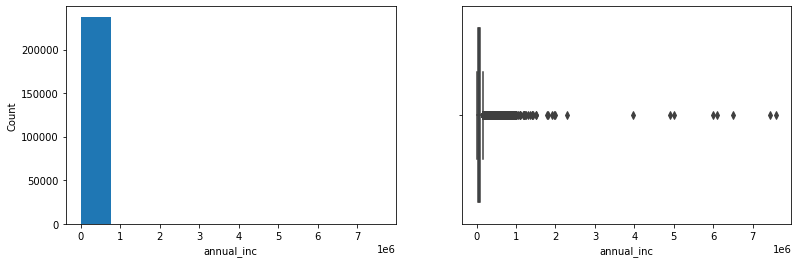

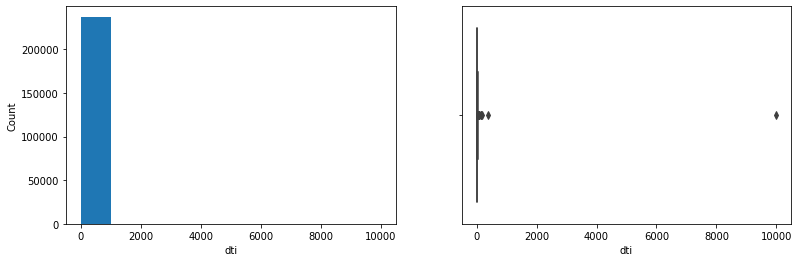

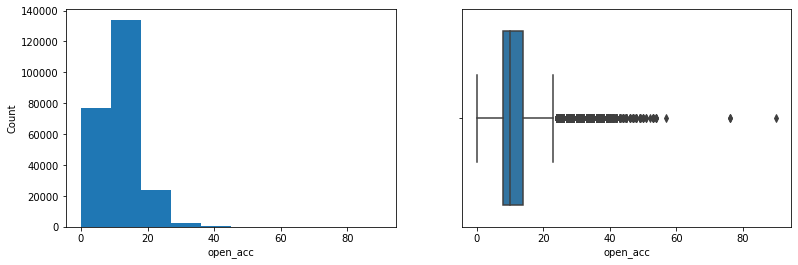

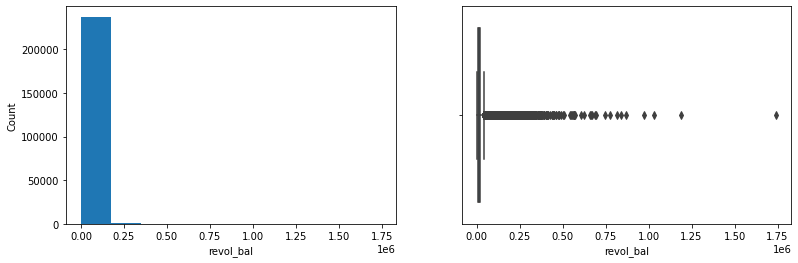

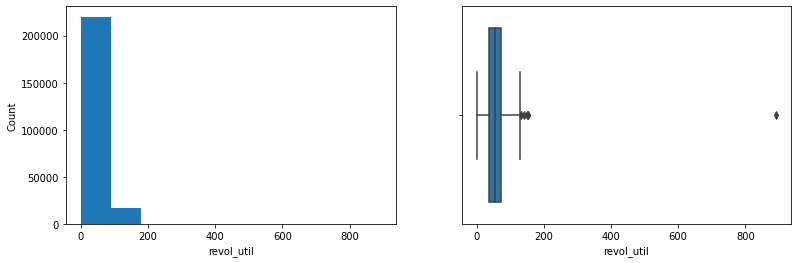

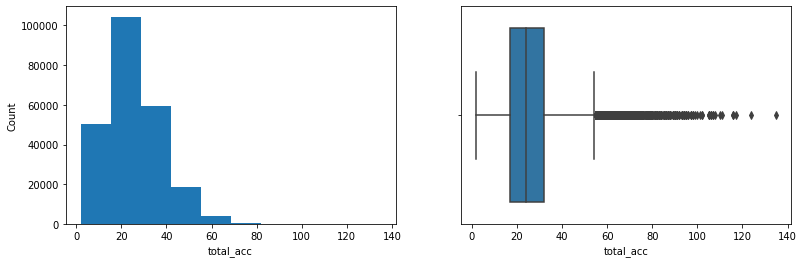

In [1111]:
for cont_var in cont_features:
    plt.figure(figsize=(13,4)) 
    plt.subplot(1, 2, 1)
    plt.hist(x_train[cont_var], histtype = 'stepfilled')
    plt.xlabel(cont_var)
    plt.ylabel('Count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x_train[cont_var])
plt.show()

##### Inference from the above graphs
- We can see that almost all the continuos features from the above plots are skewed to the right. 
- Since they are skewed, the features contain outliers which need to be treated.
- Will provide the buisness insights and recommendations in the text editor. 

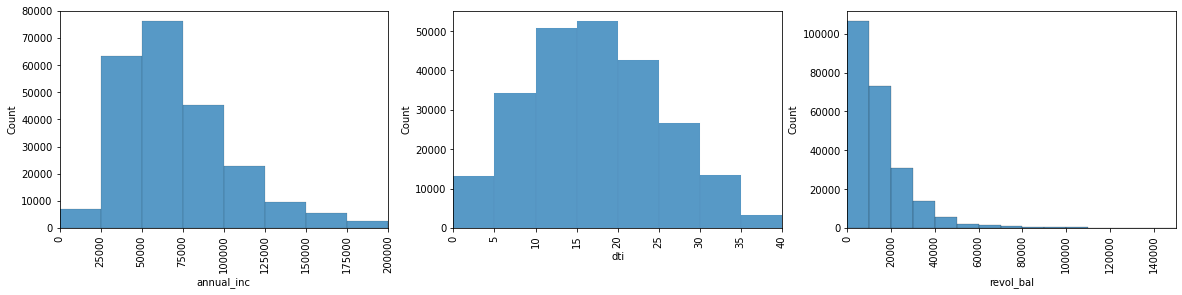

In [1112]:
# Plotting for some cont_features individually again as scaling was not properly done above due to so many outliers.
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.histplot(x_train['annual_inc'], binwidth=25000)
plt.xlim(0, 0.2*10**6)
plt.xticks(rotation='90')
plt.subplot(1,3,2)
sns.histplot(x_train['dti'], binwidth=5)
plt.xlim(0, 40)
plt.xticks(rotation='90')
plt.subplot(1,3,3)
sns.histplot(x_train['revol_bal'], binwidth=10000)
plt.xlim(0,0.15*10**6)
plt.xticks(rotation='90')
plt.show()

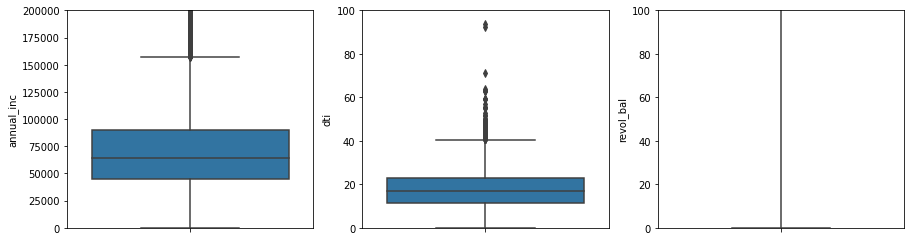

In [1113]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(y = x_train['annual_inc'])
plt.ylim(0, 0.2*10**6)
plt.subplot(1,3,2)
sns.boxplot(y = x_train['dti'])
plt.ylim(0, 100)
plt.subplot(1,3,3)
sns.boxplot(y = x_train['revol_bal'])
plt.ylim(0, 100)
plt.show()

In [1114]:
# purpose and title features appear to be same. Hence, dropping title feature
x_train.drop('title',axis = 1, inplace=True)
x_val.drop('title',axis = 1, inplace=True)
x_test.drop('title',axis = 1, inplace=True)

In [1115]:
cat_features = np.array(x_train.describe(exclude=np.number).columns)
cat_features

array(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'loan_status'], dtype=object)

In [1116]:
# Removing date_time and 'emp_title' features. 
cat_features = np.delete(cat_features, [3,7,9])

In [1117]:
# Adding 'pub_rec_bankruptcies', 'mort_acc',  'pub_rec' to cat_features as they appear to be categorical
cat_features = np.append(cat_features, ['pub_rec', 'mort_acc', 'pub_rec_bankruptcies'])
cat_features

array(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'initial_list_status',
       'application_type', 'loan_status', 'pub_rec', 'mort_acc',
       'pub_rec_bankruptcies'], dtype=object)

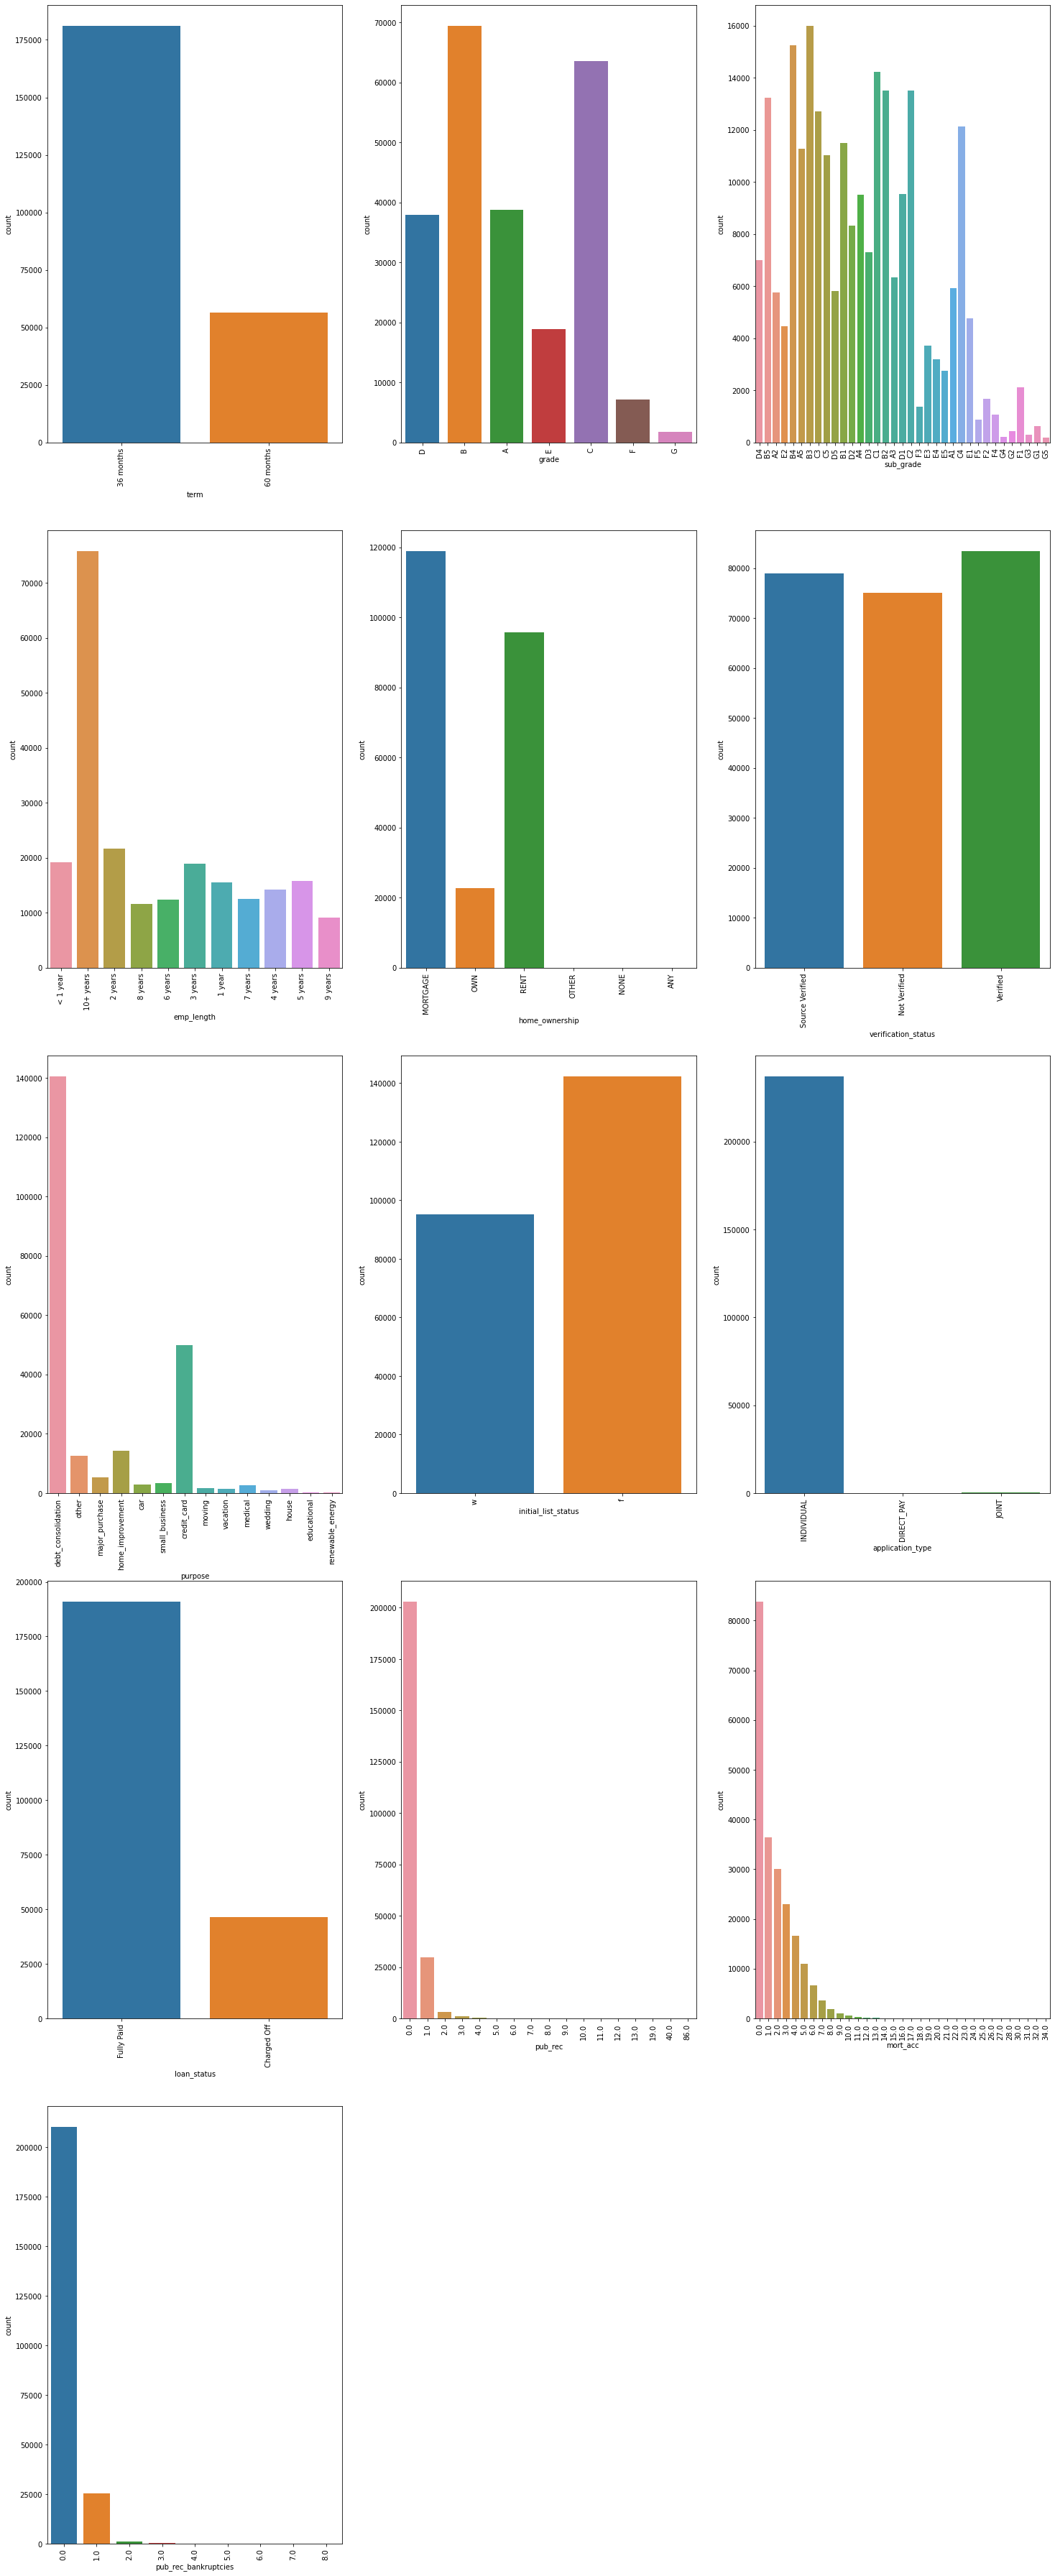

In [1118]:
i = 1
plt.figure(figsize=(25,65))
for cat_var in cat_features:
    plt.subplot(5,3,i)
    sns.countplot(x_train[cat_var])
    plt.xticks(rotation=90)
    i += 1
plt.show()

In [1119]:
# Lets now convert issue_d and earliest_cr_line features to date_time dtype
for vals in [x_train, x_test, x_val]:    
    vals['issue_d'] = pd.to_datetime(vals['issue_d'])
    vals['earliest_cr_line'] = pd.to_datetime(vals['earliest_cr_line'])

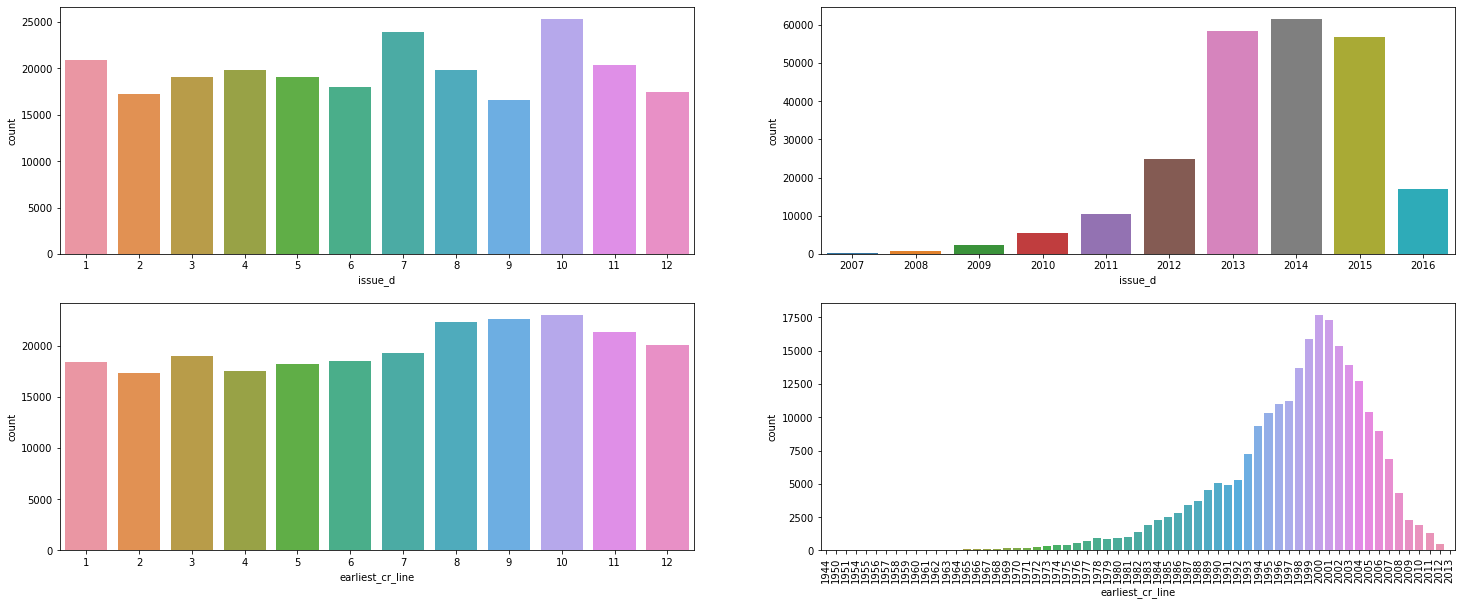

In [1120]:
plt.figure(figsize=(25,10)) 
plt.subplot(221)
sns.countplot(x_train['issue_d'].dt.month)
plt.subplot(222)
sns.countplot(x_train['issue_d'].dt.year)
plt.subplot(223)
sns.countplot(x_train['earliest_cr_line'].dt.month)
plt.subplot(224)
sns.countplot(x_train['earliest_cr_line'].dt.year)
plt.xticks(rotation='90')
plt.show()

In [1121]:
# Since emp_title' feature has a lot of categories, i'll just go with the top value_counts()
x_train['emp_title'].value_counts()[:10]

Teacher             2684
Manager             2524
Registered Nurse    1134
RN                  1114
Supervisor          1105
Sales                988
Project Manager      909
Owner                868
Driver               814
Office Manager       707
Name: emp_title, dtype: int64

#### Multivariate analyis (predictors vs target variable)

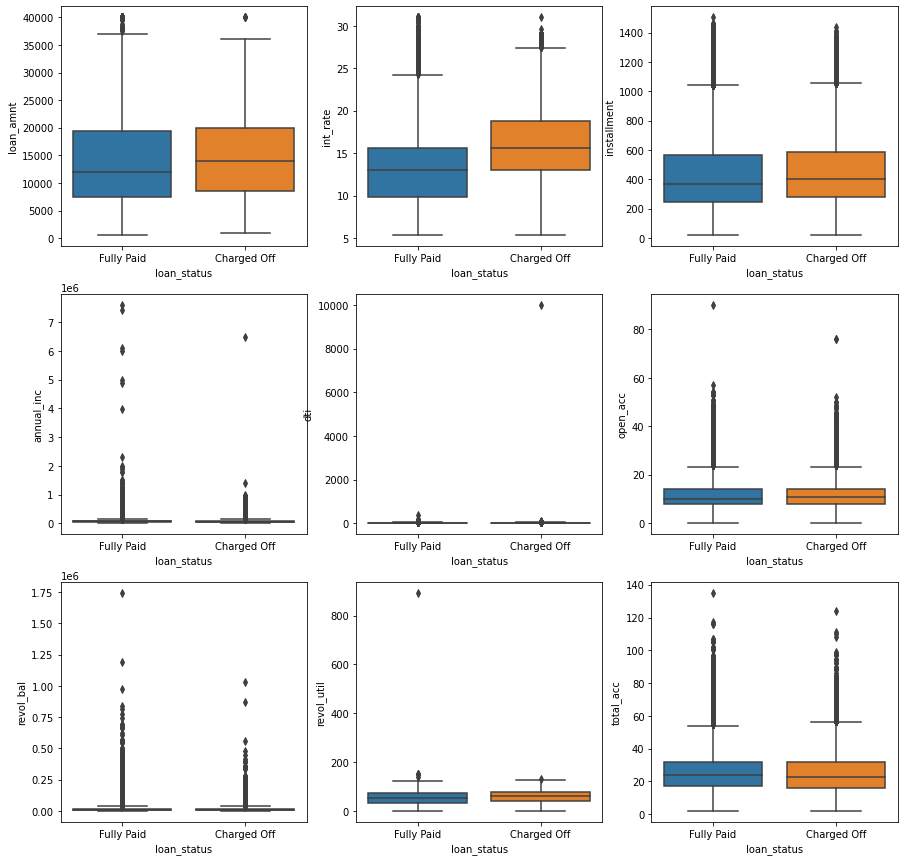

In [1122]:
i = 1
plt.figure(figsize=(15,15))
for cols in cont_features:
    plt.subplot(3,3,i)
    sns.boxplot(y=x_train[cols], x = x_train['loan_status'])
    i += 1
plt.show()

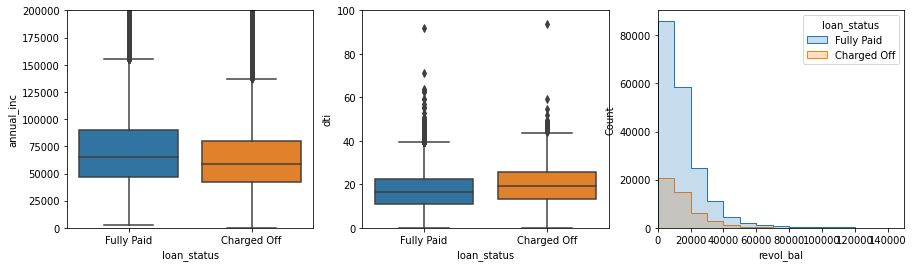

In [1123]:
# Plotting for some cont_features individually again as scaling was not properly done above due to so many outliers.
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(y=x_train['annual_inc'], x = x_train['loan_status'])
plt.ylim(0, 0.2*10**6)
plt.subplot(1,3,2)
sns.boxplot(y=x_train['dti'], x = x_train['loan_status'])
plt.ylim(0, 100)
plt.subplot(1,3,3)
sns.histplot(x = x_train['revol_bal'], binwidth=10000, hue = x_train['loan_status'], element="step")
plt.xlim(0,0.15*10**6)
plt.show()

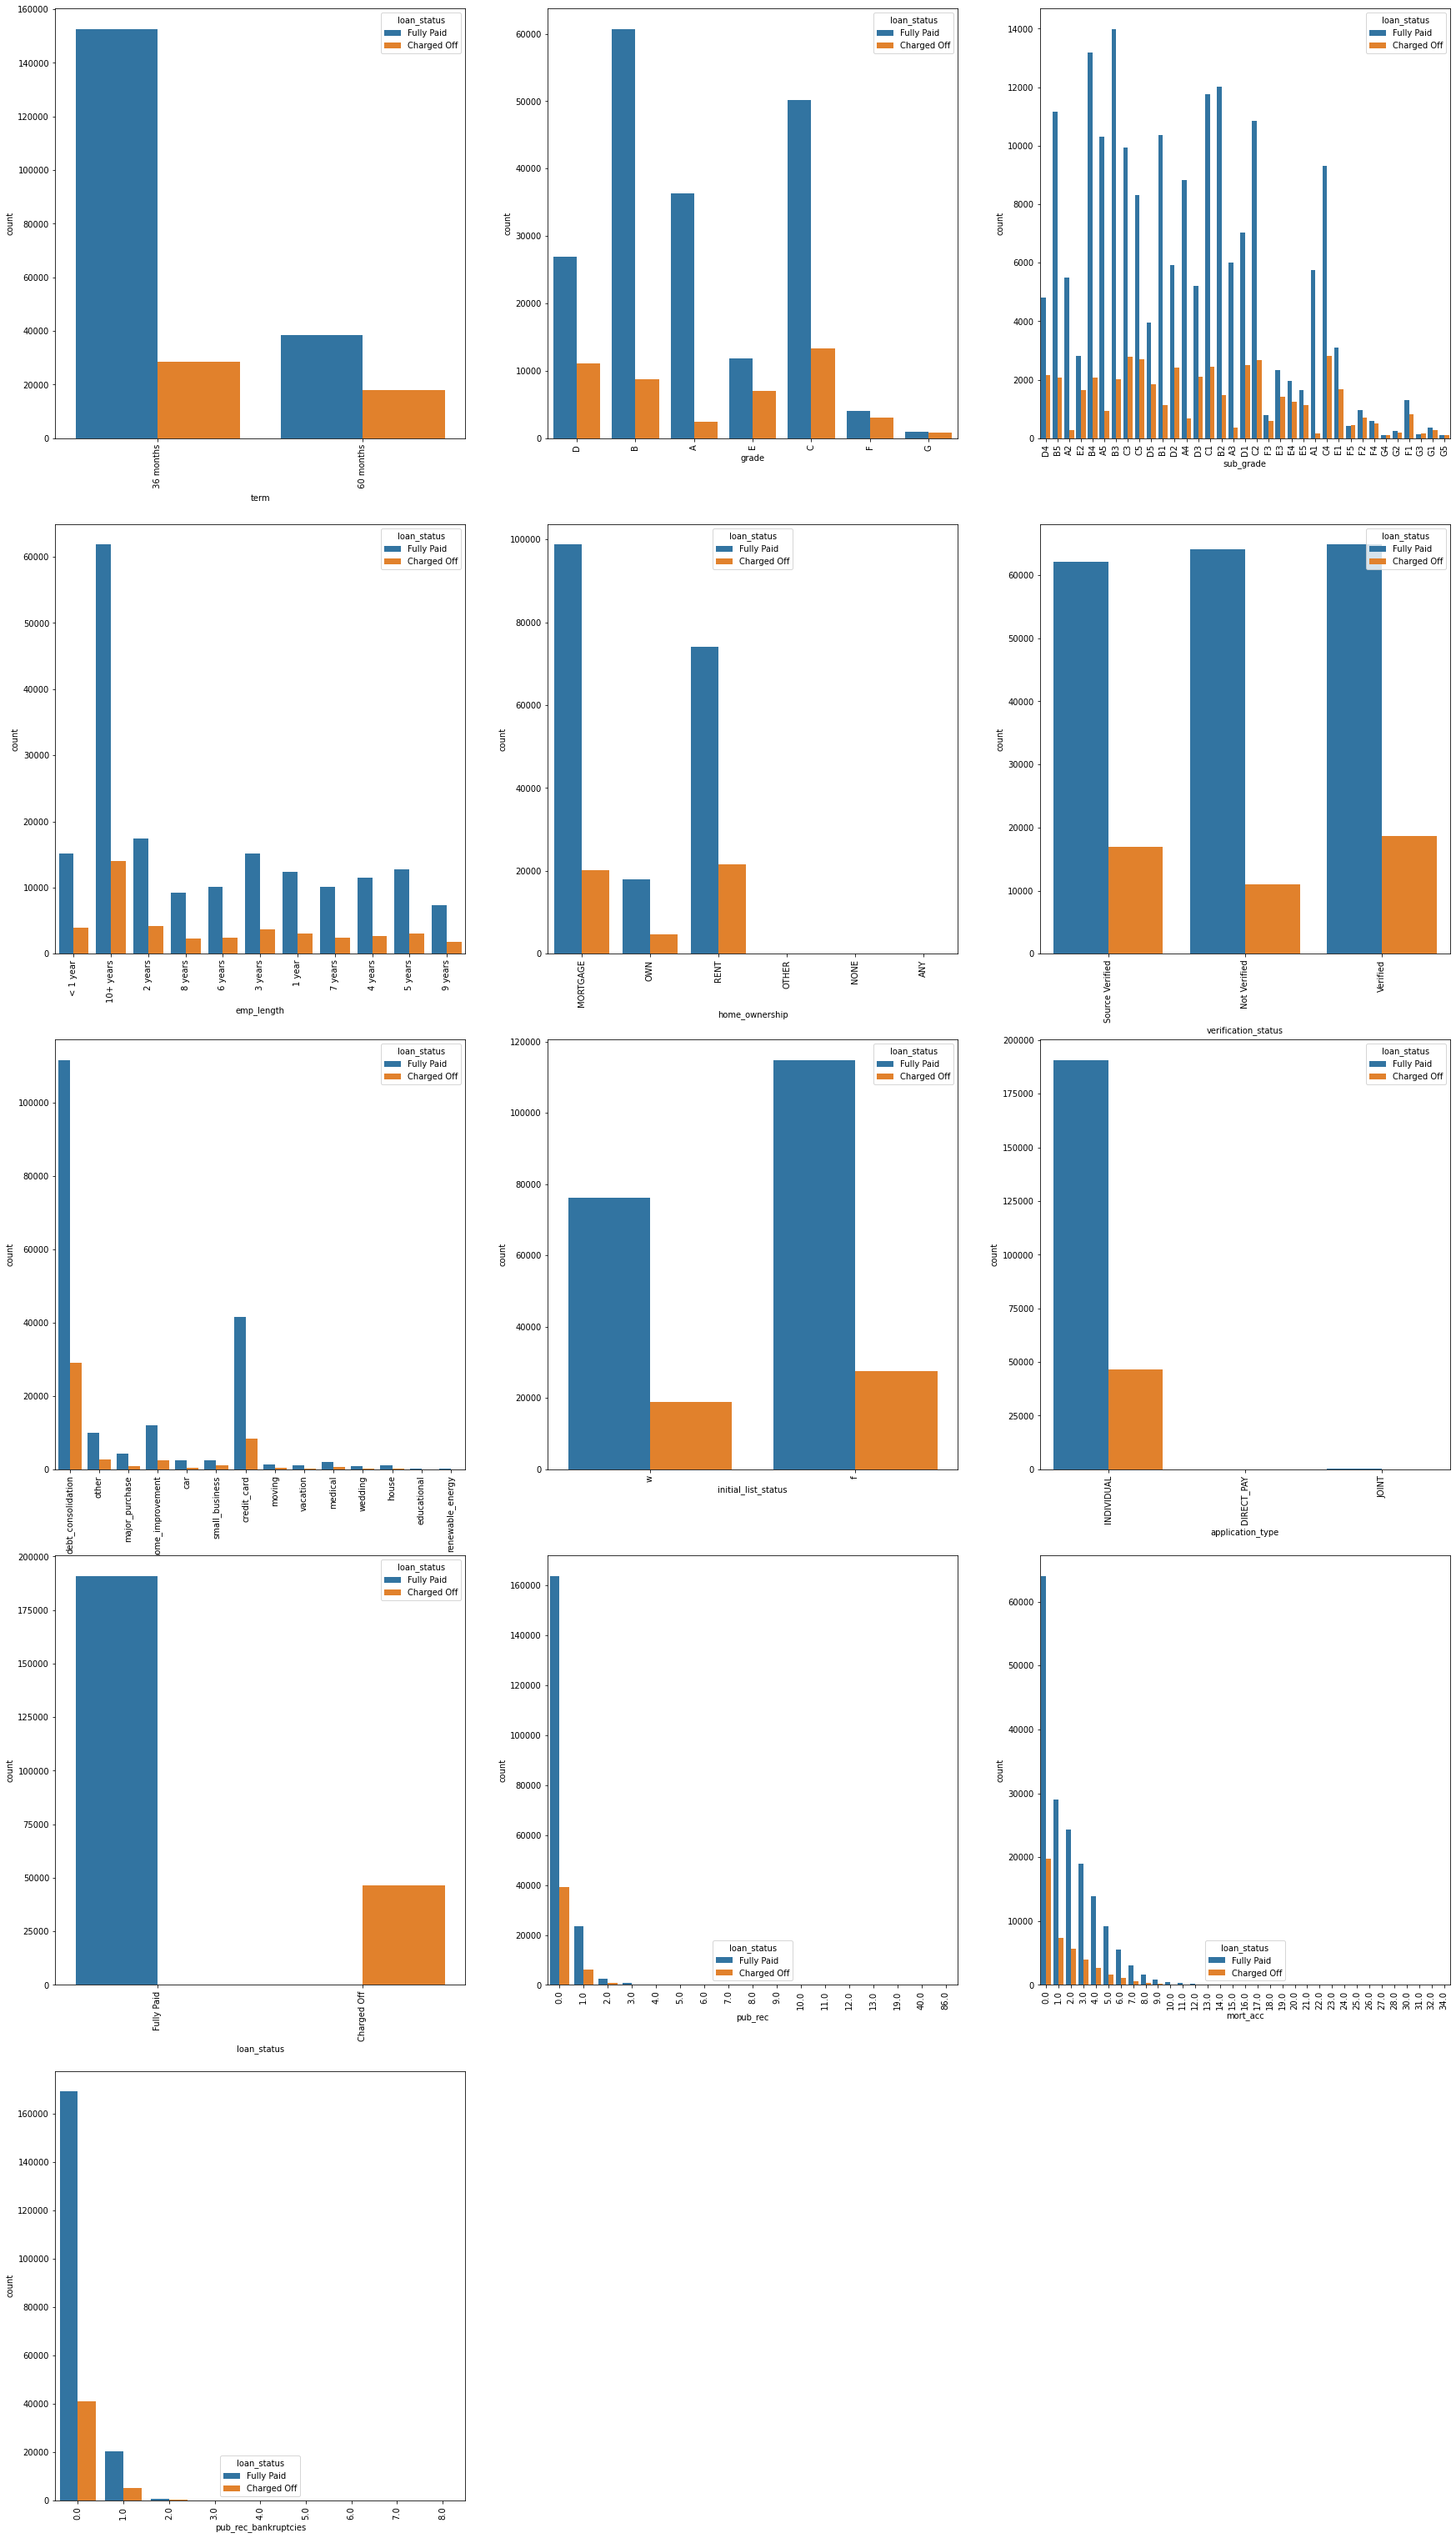

In [1124]:
plt.figure(figsize=(30,55))
for cat_var in enumerate(cat_features):
    plt.subplot(5,3,cat_var[0]+1)
    sns.countplot(x = x_train[cat_var[1]], hue = x_train['loan_status'])
    plt.xticks(rotation='90')
plt.show()

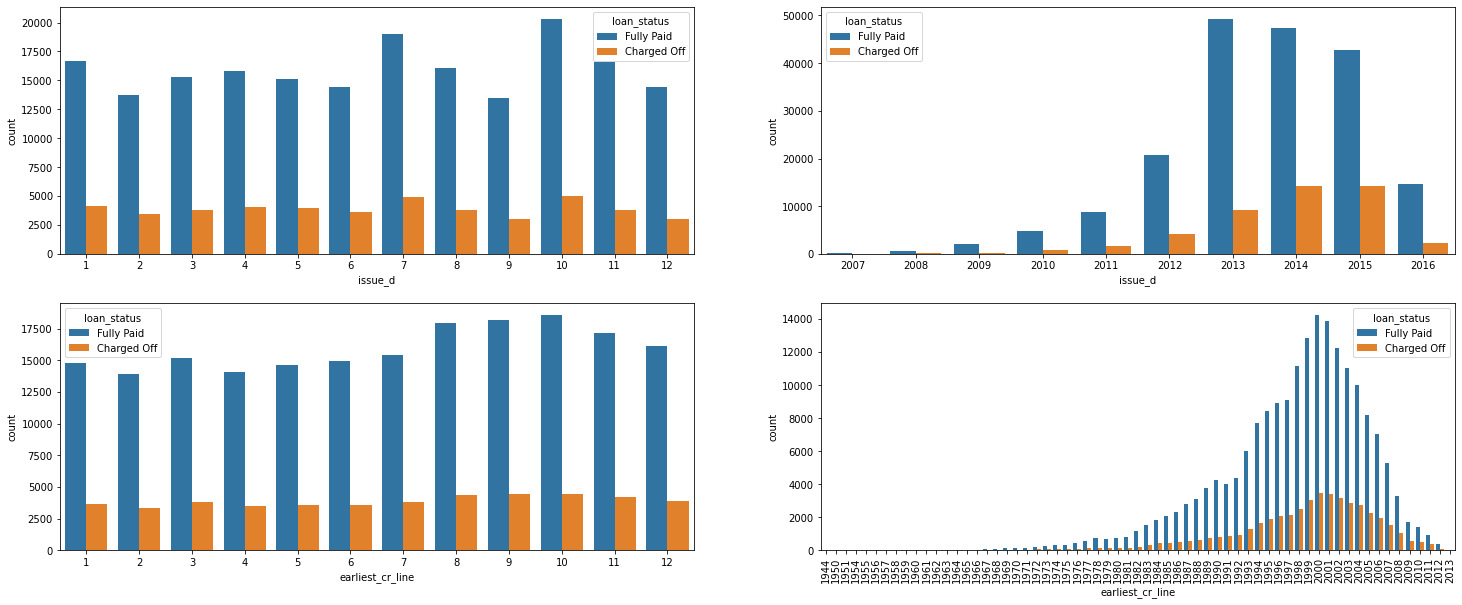

In [1125]:
plt.figure(figsize=(25,10)) 
plt.subplot(221)
sns.countplot(x = x_train['issue_d'].dt.month, hue = x_train['loan_status'])
plt.subplot(222)
sns.countplot(x = x_train['issue_d'].dt.year, hue = x_train['loan_status'])
plt.subplot(223)
sns.countplot(x = x_train['earliest_cr_line'].dt.month, hue = x_train['loan_status'])
plt.subplot(224)
sns.countplot(x = x_train['earliest_cr_line'].dt.year, hue = x_train['loan_status'])
plt.xticks(rotation='90')
plt.show()

In [1126]:
# Since emp_title' feature has a lot of categories, i'll just go with the top value_counts()
print(x_train[x_train['loan_status'] == 'Charged Off']['emp_title'].value_counts()[:5], 
x_train[x_train['loan_status'] == 'Fully Paid']['emp_title'].value_counts()[:5])

Manager             552
Teacher             516
Owner               271
Sales               232
Registered Nurse    229
Name: emp_title, dtype: int64 Teacher             2168
Manager             1972
Registered Nurse     905
RN                   896
Supervisor           879
Name: emp_title, dtype: int64


### Feature Encoding and engineering

In [1127]:
x_train['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1128]:
# replacing term with 0's and 1's
x_train['term'].replace({' 36 months':0, ' 60 months': 1}, inplace = True)
x_test['term'].replace({' 36 months':0, ' 60 months': 1}, inplace = True)
x_val['term'].replace({' 36 months':0, ' 60 months': 1}, inplace = True)

In [1129]:
x_train['grade'].unique()

array(['D', 'B', 'A', 'E', 'C', 'F', 'G'], dtype=object)

In [1130]:
# Considering A as the best grade. 
x_train['grade'].replace({'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}, inplace = True)
x_test['grade'].replace({'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}, inplace = True)
x_val['grade'].replace({'A':6, 'B':5, 'C':4, 'D':3, 'E':2, 'F':1, 'G':0}, inplace = True)

In [1131]:
# Considering A1 as the best sub-grade. Each grade has 5 subgrades
x_train['sub_grade'].unique(), len(x_val['sub_grade'].unique())

(array(['D4', 'B5', 'A2', 'E2', 'B4', 'A5', 'B3', 'C3', 'C5', 'D5', 'B1',
        'D2', 'A4', 'D3', 'C1', 'B2', 'A3', 'D1', 'C2', 'F3', 'E3', 'E4',
        'E5', 'A1', 'C4', 'E1', 'F5', 'F2', 'F4', 'G4', 'G2', 'F1', 'G3',
        'G1', 'G5'], dtype=object),
 35)

In [1132]:
sub_grades = 34
for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G']:
    for j in range(1,6):
        x_train['sub_grade'].replace(f'{i}{j}', sub_grades, inplace = True)
        x_test['sub_grade'].replace(f'{i}{j}', sub_grades, inplace = True)
        x_val['sub_grade'].replace(f'{i}{j}', sub_grades, inplace = True)
        sub_grades -= 1

In [1133]:
x_train['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [1134]:
x_train['loan_status'].replace({'Charged Off':0, 'Fully Paid': 1}, inplace = True)
x_test['loan_status'].replace({'Charged Off':0, 'Fully Paid': 1}, inplace = True)
x_val['loan_status'].replace({'Charged Off':0, 'Fully Paid': 1}, inplace = True)

In [1135]:
# emp_length is an ordinal categorical variable from <1year to 10+years
x_train['emp_length'].unique()

array(['< 1 year', '10+ years', '2 years', '8 years', '6 years',
       '3 years', nan, '1 year', '7 years', '4 years', '5 years',
       '9 years'], dtype=object)

In [1136]:
emp_lengths = np.sort(np.delete(x_train['emp_length'].unique(), [0, 1, 6]))

In [1137]:
for data in [x_train, x_test, x_val]:
    data['emp_length'].replace({'< 1 year': 0, '10+ years':10}, inplace = True)
    for i in range(len(emp_lengths)):
        data['emp_length'].replace(emp_lengths[i], i+1, inplace = True)

In [1138]:
# As there are many categories, lets perform target encoding instead of one-hot
x_train['purpose'].unique(), x_train['emp_title'].unique()

(array(['debt_consolidation', 'other', 'major_purchase',
        'home_improvement', 'car', 'small_business', 'credit_card',
        'moving', 'vacation', 'medical', 'wedding', 'house', 'educational',
        'renewable_energy'], dtype=object),
 array(['Accounts Payable Specialist', 'Teacher', 'McKinney ISD', ...,
        'operator machine cnc', 'Lombardo Bros. Masonry,LLC',
        'Travel Counselor - TLS'], dtype=object))

In [1139]:
# Since there are too many features aleady, I'll go with target encoding again
x_train['home_ownership'].unique(), x_train['verification_status'].unique(), x_train['application_type'].unique()

(array(['MORTGAGE', 'OWN', 'RENT', 'OTHER', 'NONE', 'ANY'], dtype=object),
 array(['Source Verified', 'Not Verified', 'Verified'], dtype=object),
 array(['INDIVIDUAL', 'DIRECT_PAY', 'JOINT'], dtype=object))

In [1140]:
# adding all the features which needs to be target encoded to a list
target_encode_features = ['purpose', 'emp_title', 'home_ownership', 'verification_status', 'application_type']

In [1141]:
import category_encoders as ce

In [1142]:
y_val.shape, x_val.shape, y_val.shape, x_val.shape

((79206,), (79206, 25), (79206,), (79206, 25))

In [1143]:
for fea in target_encode_features:
    x_train[fea] = ce.TargetEncoder().fit_transform(x_train[fea],x_train['loan_status'])
    x_val[fea] = ce.TargetEncoder().fit_transform(x_val[fea],x_val['loan_status'])
    x_test[fea] = ce.TargetEncoder().fit_transform(x_test[fea],x_test['loan_status'])

In [1144]:
x_train['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [1145]:
# Label encoding
x_train['initial_list_status'].replace({'w':0,'f':1}, inplace = True)
x_test['initial_list_status'].replace({'w':0,'f':1}, inplace = True)
x_val['initial_list_status'].replace({'w':0,'f':1}, inplace = True)

In [1146]:
# Encoding date_time features
for data_sets in [x_train, x_test, x_val]:
    data_sets['issue_yr'] = data_sets['issue_d'].dt.year
    data_sets['issue_mo'] = data_sets['issue_d'].dt.month
    data_sets['earliest_cr_line_yr'] = data_sets['earliest_cr_line'].dt.year
    data_sets['earliest_cr_line_mo'] = data_sets['earliest_cr_line'].dt.month

    data_sets.drop(['issue_d', 'earliest_cr_line'], axis = 1, inplace=True)

In [1147]:
x_train['pub_rec'].unique(), x_train['mort_acc'].unique(), x_train['pub_rec_bankruptcies'].unique()

(array([ 1.,  0.,  4.,  3.,  2.,  5.,  6.,  8.,  7., 13., 12., 11.,  9.,
        19., 10., 86., 40.]),
 array([ 2.,  0.,  3.,  1., nan,  5., 16.,  6.,  4.,  9.,  7., 10., 11.,
        13.,  8., 12., 22., 15., 24., 18., 14., 20., 27., 17., 19., 23.,
        25., 31., 21., 26., 34., 28., 32., 30.]),
 array([ 1.,  0.,  2.,  4., nan,  3.,  6.,  5.,  8.,  7.]))

In [1148]:
# Creating flags and changing the values greater than one to one in the columns 'pub_rec', 'mort_acc' and 'pub_rec_bankruptcies'
def func(x):
    if x > 1:
        return 1
    elif x < 1:
        return 0
for data_sets in [x_train, x_test, x_val]:
    data_sets['pub_rec'] = data_sets['pub_rec'].apply(func)
    data_sets['mort_acc'] = data_sets['mort_acc'].apply(func)
    data_sets['pub_rec_bankruptcies'] = data_sets['pub_rec_bankruptcies'].apply(func)


In [1149]:
# All features have been converted to int or float data type
x_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79206 entries, 85557 to 109034
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             79206 non-null  float64
 1   term                  79206 non-null  int64  
 2   int_rate              79206 non-null  float64
 3   installment           79206 non-null  float64
 4   grade                 79206 non-null  int64  
 5   sub_grade             79206 non-null  int64  
 6   emp_title             79206 non-null  float64
 7   emp_length            75488 non-null  float64
 8   home_ownership        79206 non-null  float64
 9   annual_inc            79206 non-null  float64
 10  verification_status   79206 non-null  float64
 11  purpose               79206 non-null  float64
 12  dti                   79206 non-null  float64
 13  open_acc              79206 non-null  float64
 14  pub_rec               69331 non-null  float64
 15  revol_bal     

In [1150]:
# Going for spearman correlation
spearman_corr = x_train.corr(method='spearman')

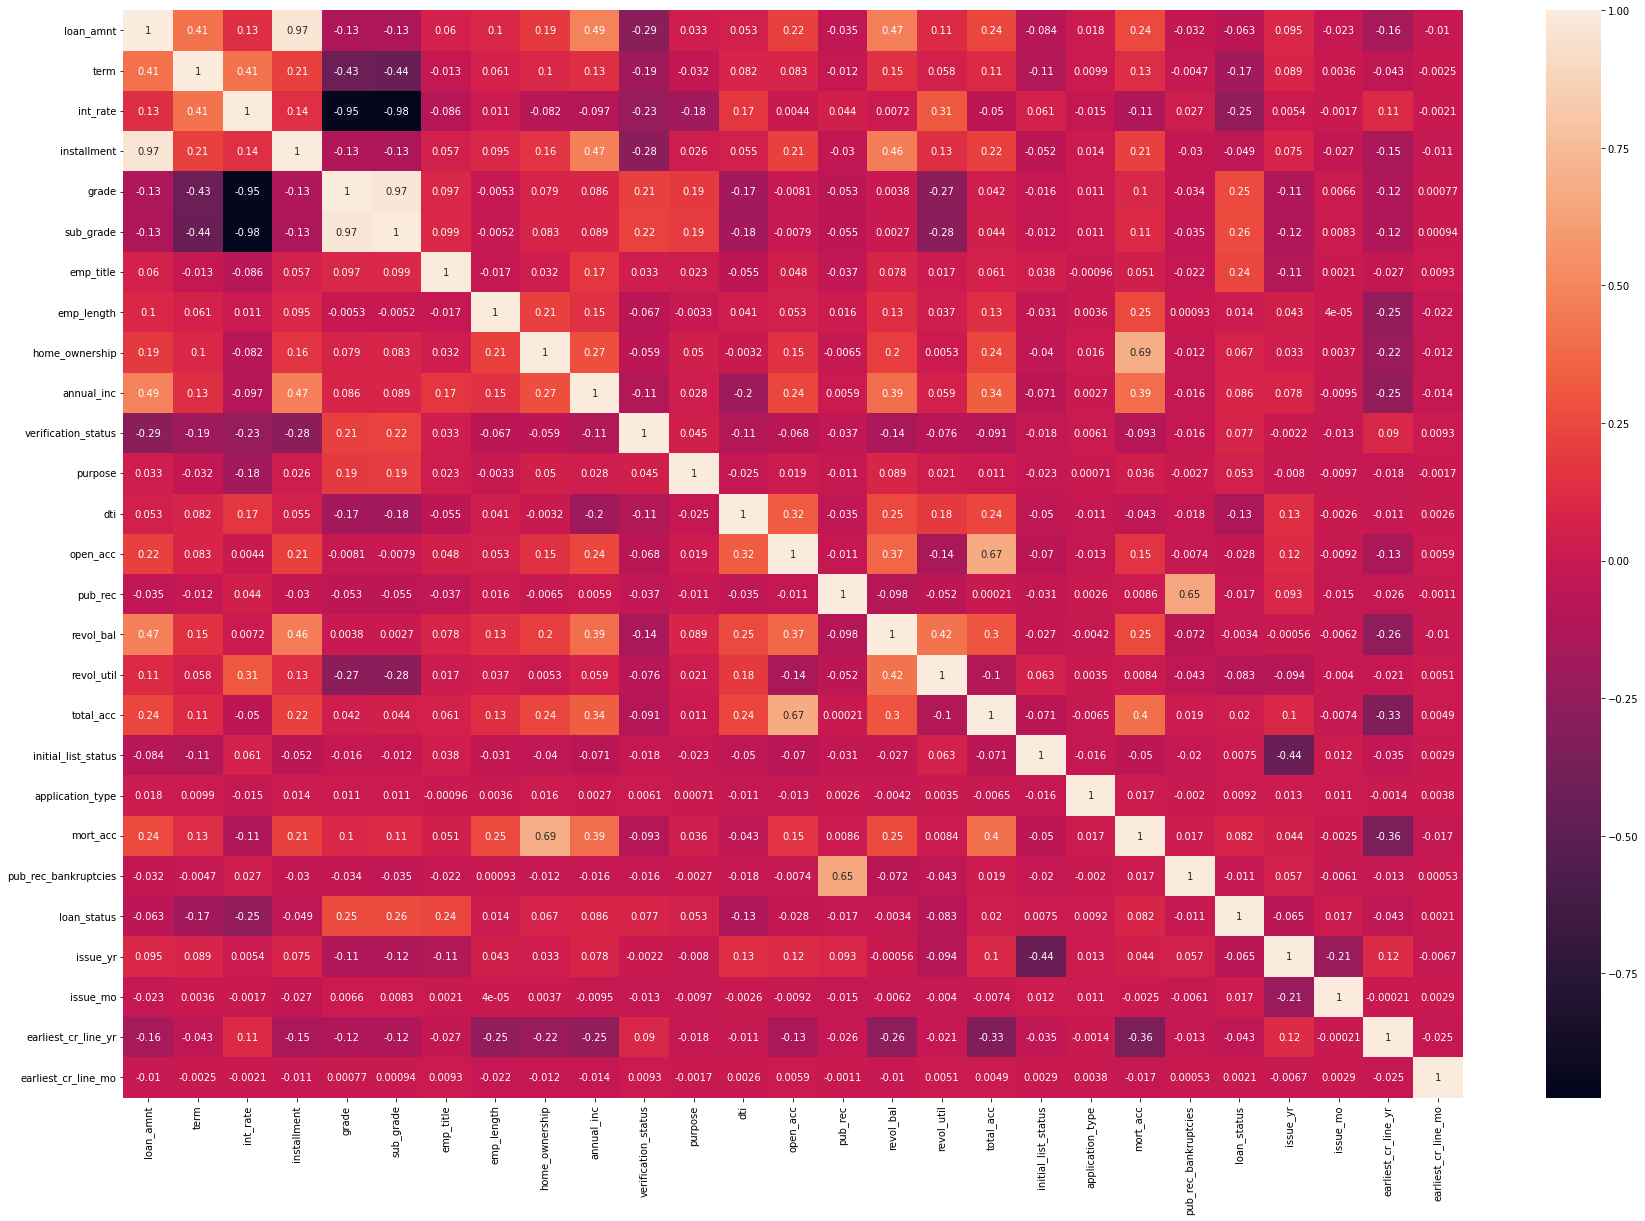

In [1151]:
plt.figure(figsize=(30,20))
sns.heatmap(spearman_corr, annot=True)
plt.show()

In [1152]:
x_train['emp_length'].unique()

array([ 0., 10.,  2.,  8.,  6.,  3., nan,  1.,  7.,  4.,  5.,  9.])

In [1153]:
# Lets drop some columns which has high correlation with each other.
for data_sets in [x_train, x_test, x_val]:
    data_sets.drop('int_rate', axis=1, inplace=True) # int_rate has high negative correlation with grade and subgrade
    data_sets.drop('sub_grade', axis=1, inplace=True) # grade has high positive correlation with subgrade
    data_sets.drop('mort_acc', axis=1, inplace=True) #mort_acc has high positive correlation with pub_rec_bankruptcies
    data_sets.drop('pub_rec', axis=1, inplace=True) #pub_rec has high positive correlation with pub_rec_bankruptcies and mort_acc
    data_sets.drop('total_acc', axis=1, inplace=True) #total_acc and open_acc has high positive correlation among each other
    data_sets.drop('installment', axis=1, inplace=True) # installment and loan_amnt has high positive correlation among each other

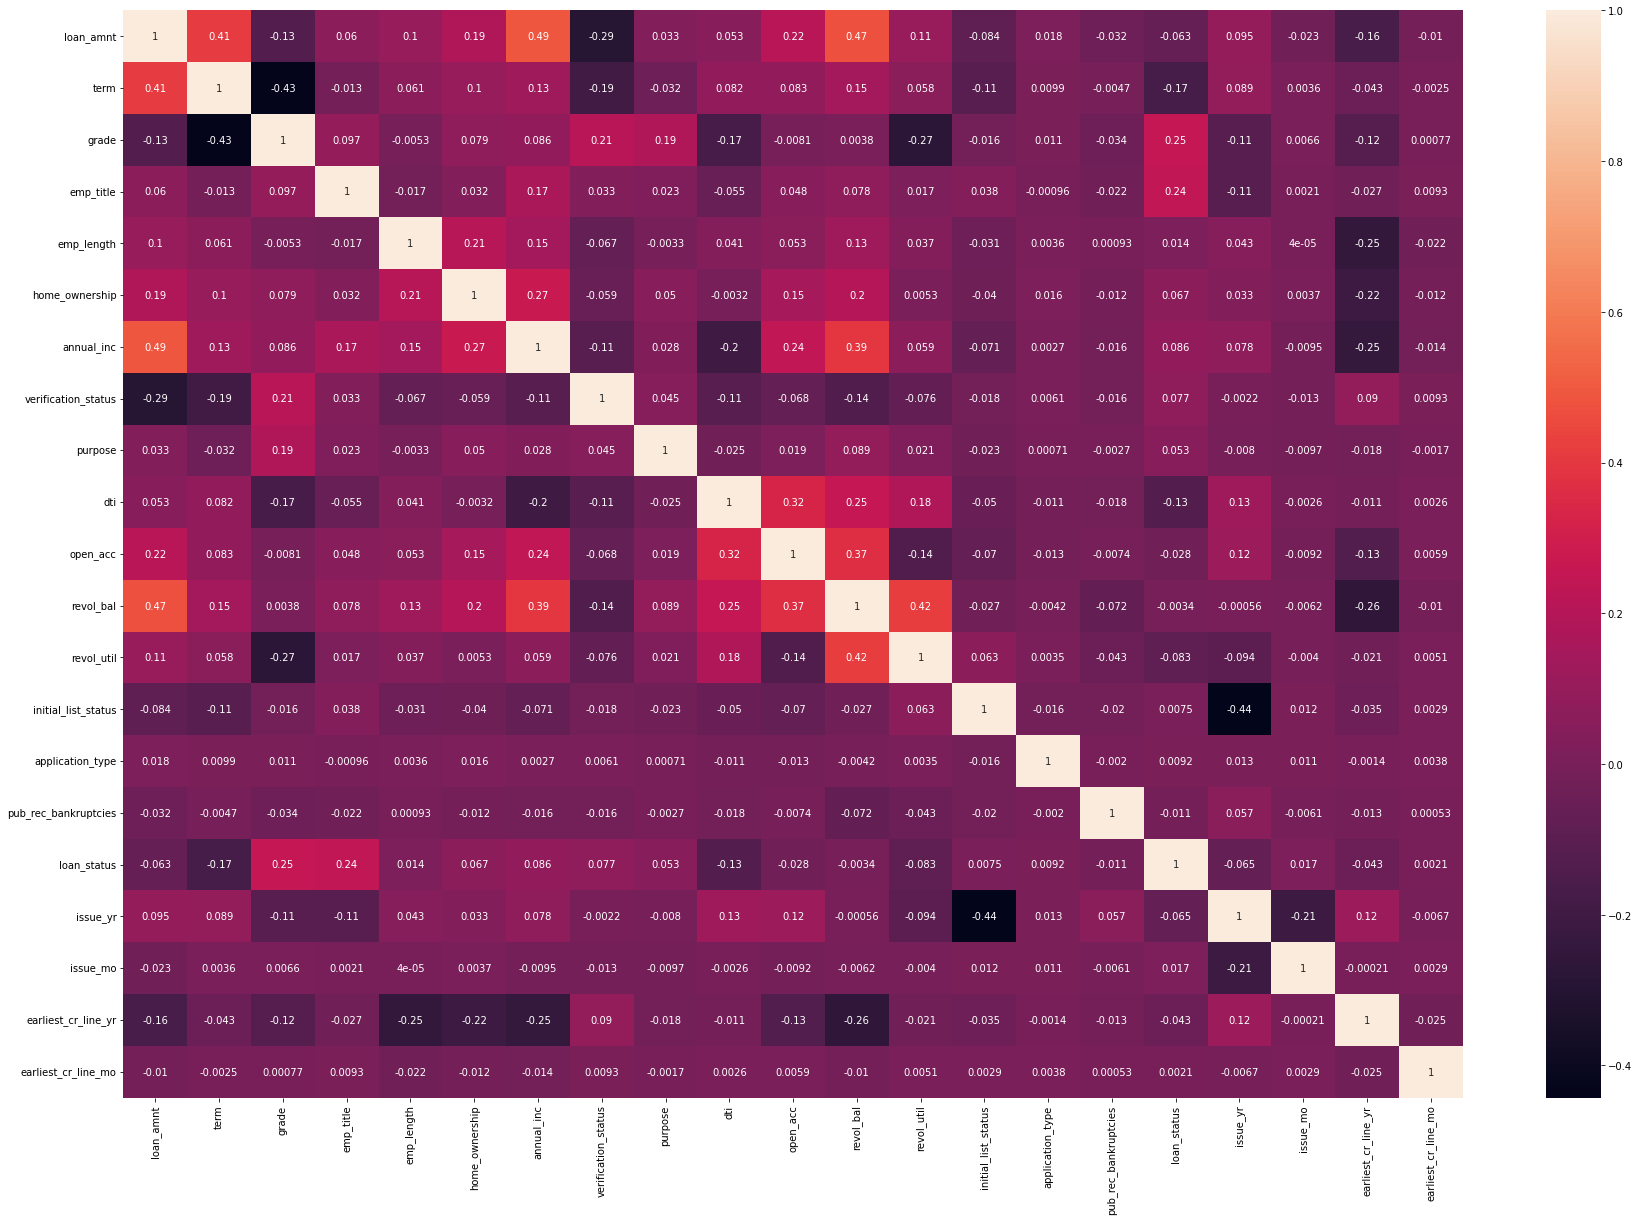

In [1154]:
# Going for spearman correlation. 
spearman_corr = x_train.corr(method='spearman')
plt.figure(figsize=(30,20))
sns.heatmap(spearman_corr, annot=True)
plt.show()

#### Missing Value Treatment

In [1155]:
x_train.isnull().sum()/x_train.shape[0]*100

loan_amnt                0.000000
term                     0.000000
grade                    0.000000
emp_title                0.000000
emp_length               4.575411
home_ownership           0.000000
annual_inc               0.000000
verification_status      0.000000
purpose                  0.000000
dti                      0.000000
open_acc                 0.000000
revol_bal                0.000000
revol_util               0.071123
initial_list_status      0.000000
application_type         0.000000
pub_rec_bankruptcies    10.878805
loan_status              0.000000
issue_yr                 0.000000
issue_mo                 0.000000
earliest_cr_line_yr      0.000000
earliest_cr_line_mo      0.000000
dtype: float64

In [1156]:
#Missing values in revol_util and pub_rec_bankruptcies are very less. Hence we can drop the null value rows
x_train.dropna(subset=['revol_util'], inplace = True)
x_test.dropna(subset=['revol_util'],inplace = True) 
x_val.dropna(subset=['revol_util'],inplace = True) 

In [1157]:
for data_sets in [x_train, x_test, x_val]:
    data_sets['emp_length'].fillna(value = data_sets['emp_length'].mode()[0], inplace = True)
    data_sets['pub_rec_bankruptcies'].fillna(value = data_sets['pub_rec_bankruptcies'].mode()[0], inplace = True)

In [1158]:
# No missing values found
x_train.isnull().sum()/x_train.shape[0]*100

loan_amnt               0.0
term                    0.0
grade                   0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
purpose                 0.0
dti                     0.0
open_acc                0.0
revol_bal               0.0
revol_util              0.0
initial_list_status     0.0
application_type        0.0
pub_rec_bankruptcies    0.0
loan_status             0.0
issue_yr                0.0
issue_mo                0.0
earliest_cr_line_yr     0.0
earliest_cr_line_mo     0.0
dtype: float64

In [1159]:
x_val.isnull().sum()/x_train.shape[0]*100

loan_amnt               0.0
term                    0.0
grade                   0.0
emp_title               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
purpose                 0.0
dti                     0.0
open_acc                0.0
revol_bal               0.0
revol_util              0.0
initial_list_status     0.0
application_type        0.0
pub_rec_bankruptcies    0.0
loan_status             0.0
issue_yr                0.0
issue_mo                0.0
earliest_cr_line_yr     0.0
earliest_cr_line_mo     0.0
dtype: float64

#### Outlier Treatment using IQR method

In [1160]:
cont_features

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc'],
      dtype='object')

In [1161]:
#Will be using IQR method to treat the outliers present in the continuos variables
cont_features = cont_features.delete([1,2,-1])

In [1162]:
def IQR(col):
    Q3 = np.percentile(col, 75)
    Q1 = np.percentile(col, 25)
    iqr = Q3-Q1
    upper_lmt = Q3+1.5*iqr
    lower_lmt = Q1-1.5*iqr
    return lower_lmt, upper_lmt

In [1163]:
for cont_var in cont_features:
    x_train = x_train[(x_train[cont_var]>=IQR(x_train[cont_var])[0])&(x_train[cont_var]<=IQR(x_train[cont_var])[1])]

#### Duplicates treatment

In [1164]:
# No duplicates found
x_train.duplicated().value_counts()

False    210605
dtype: int64

#### Imbalance check

In [1165]:
# We can see that there is a huge imbalance of classes. Will be using weighted balancing method while model training
y_train.value_counts()

Fully Paid     191038
Charged Off     46580
Name: loan_status, dtype: int64

#### Training a Logistic regression model

In [1166]:
# Removing target variable from all the 3 data sets and creating target variable y columns again
y_train = x_train['loan_status']
x_train = x_train.drop('loan_status', axis = 1)
y_test = x_test['loan_status']
x_test = x_test.drop('loan_status', axis = 1)
y_val = x_val['loan_status']
x_val = x_val.drop('loan_status', axis = 1)

In [1167]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

##### Defining type1 and type 2 error before modelling
- 1 - Fully paid, 0 - Charged off
- type1 error (False postive) : Model has falsely predicted that an individual will fully the loan amount.
- type2 error (False negative) : Model has falsely predicted that an individual will be charged off. 
- Will be tuning my model based on precision score which controls false positives. Would not want to increase line of credit for non creditworthy individuals

In [1168]:
from sklearn.metrics import precision_score, PrecisionRecallDisplay, RocCurveDisplay, recall_score, ConfusionMatrixDisplay

In [1169]:
# Creating a pipeline which does scaling first and then trains a model. Will be using ridge regularisation to avoid overfit.
# Hyperparameter C(1/λ) is decided based on the best score on validation data.
train_scores = []
val_scores = []
for lmda in np.arange(1, 100, 1): # range of values of Lambda
    #Creating a pipeline
    pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(penalty='l2',  C=1/lmda, class_weight={1:1, 0:(191038/46580)}))
    
    pipeline.fit(x_train, y_train) #Training model
    
    train_pred = pipeline.predict(x_train) #Predicting train values
    
    train_scores.append(precision_score(y_train, train_pred)) #Getting precision score for train data set.
    
    val_pred = pipeline.predict(x_val) #Predicting validation values
    
    val_scores.append(precision_score(y_val, val_pred)) #Getting precision score for validation data set.

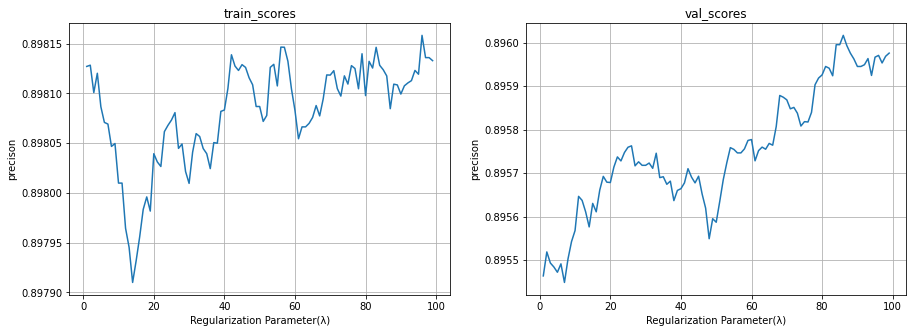

In [1170]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.lineplot(np.arange(1, 100, 1), train_scores)
plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("precison")
plt.title("train_scores")
plt.grid()
plt.subplot(1,2,2)
sns.lineplot(np.arange(1, 100, 1), val_scores)
plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("precison")
plt.title("val_scores")
plt.grid()
plt.show()


In [1171]:
# The best value of lambda for the highest precision score came out to be 86 or c 1/86.
np.argmax(val_scores)+1, max(val_scores)

(86, 0.8960167552263119)

In [1172]:
best_pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(penalty='l2',  C=1/86, class_weight={1:1, 0:(191038/46580)}))
best_pipeline.fit(x_train, y_train)
train_predictions = best_pipeline.predict(x_train)
test_predictions = best_pipeline.predict(x_test)
precision_score(y_train, train_predictions), precision_score(y_test, test_predictions)

(0.8981176523546226, 0.8946739534974829)

#### 0.894 is our score on test data set using best_pipeline model.

#### Feature weights and its importance

In [1173]:
best_pipeline[1].coef_[0]

array([-0.56716216, -0.45385136,  1.9311417 ,  6.34746557,  0.04413189,
        0.80269123,  0.89436773,  0.1239122 ,  0.36733854, -0.77087636,
       -0.45718063,  0.34891655, -0.71654255, -0.05511867,  0.13668311,
       -0.09724329, -0.08157176,  0.12887524,  0.03707136,  0.02736661])

In [1177]:
weights_x_train = pd.DataFrame(data = {'features' : x_train.columns, 'weights' : best_pipeline[1].coef_[0]})
weights_x_train.sort_values(by = 'weights', key = abs)
# We have so many columns with negligible weightage. emp_title has an insane upper hand as compared to other columns

,features,weights
19,earliest_cr_line_mo,0.027367
18,earliest_cr_line_yr,0.037071
4,emp_length,0.044132
13,initial_list_status,-0.055119
16,issue_yr,-0.081572
15,pub_rec_bankruptcies,-0.097243
7,verification_status,0.123912
17,issue_mo,0.128875
14,application_type,0.136683
11,revol_bal,0.348917


In [1178]:
ordered_features = np.array(weights_x_train.sort_values(by = 'weights', key = abs)['features'])

In [1179]:
ordered_features

array(['earliest_cr_line_mo', 'earliest_cr_line_yr', 'emp_length',
       'initial_list_status', 'issue_yr', 'pub_rec_bankruptcies',
       'verification_status', 'issue_mo', 'application_type', 'revol_bal',
       'purpose', 'term', 'open_acc', 'loan_amnt', 'revol_util', 'dti',
       'home_ownership', 'annual_inc', 'grade', 'emp_title'], dtype=object)

In [1180]:
# Dropping features from train and val data set in the order from ordered_features to see if there is any change in score.
# Lesser the better
_train_scores = []
_val_scores = []
for i in range(1,len(ordered_features)):
    new_pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(penalty='l2',  C=1/86, class_weight={1:1, 0:(191038/46580)}))
    new_x_train = x_train.drop(ordered_features[:i], axis = 1)
    new_x_val = x_val.drop(ordered_features[:i], axis = 1)
    new_pipeline.fit(new_x_train, y_train)
    _train_scores.append(precision_score(y_train, new_pipeline.predict(new_x_train)))
    _val_scores.append(precision_score(y_val, new_pipeline.predict(new_x_val)))

<AxesSubplot:>

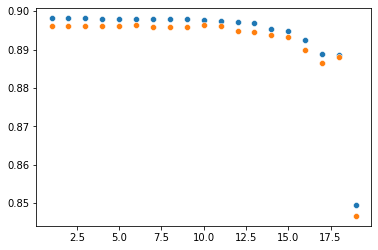

In [1181]:
sns.scatterplot(x = np.arange(1,len(ordered_features),1),y = _train_scores)
sns.scatterplot(x = np.arange(1,len(ordered_features),1),y = _val_scores)

In [1182]:
_val_scores

[0.8959920888837182,
 0.8960676335996277,
 0.896020016292331,
 0.8961406501385955,
 0.8961560082966639,
 0.8962522054404095,
 0.8957554388887813,
 0.895750576472184,
 0.8957751937984496,
 0.8965060053033848,
 0.8961175645123568,
 0.8949014516700107,
 0.8946285445530973,
 0.8938879623270872,
 0.8932501905897531,
 0.8898572618286754,
 0.8864615617204626,
 0.8880314055917273,
 0.8467054908485857]

In [1183]:
# We'll keep 0.88 as the threshold and remove all the features from the until our validation scores drops below 0.88
_val_scores[-2:]
# Just with the features grade and emp_title we can achieve a score of 0.89 on validation data set. Eventhough this is a very
# good score, i'll still go with annual_inc, dti, home_ownership, grade and emp_title as per the business domain. 

[0.8880314055917273, 0.8467054908485857]

In [1184]:
# changing x_train and x_test again and training a new model with fewer features
x_train = x_train[['annual_inc','dti', 'home_ownership', 'grade', 'emp_title']]
x_test = x_test[['annual_inc','dti', 'home_ownership', 'grade', 'emp_title']]
best_new_pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(penalty='l2',  C=0.1, class_weight={1:1,0:(191038/46580)}))
best_new_pipeline.fit(x_train, y_train)
train_predictions = best_new_pipeline.predict(x_train)
test_predictions = best_new_pipeline.predict(x_test)
precision_score(y_train, train_predictions), precision_score(y_test, test_predictions), recall_score(y_test, test_predictions)

(0.894733676200788, 0.8912444933920705, 0.7126031920748487)

##### best_new_pipeline is the optimised model with fewer features. Model with a test precision score of 0.891 is ready for deployment

#### ROC, PRC and Confusion matrix

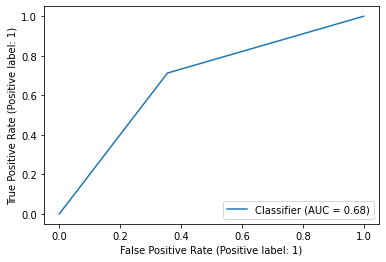

In [1186]:
# Auc = 0.68 which is better than the random model(0.5 AUC), but not the best obviously. It might be because of 2 reasons. 
# 1. y_test data is highly imbalanced. Due to this AUC-ROC doesn't work.
# 2. We built our model only trying to decrease our false positives. But, TPR which is recall also includes false negatives
# which we did not take into our account. 
RocCurveDisplay.from_predictions(y_test, test_predictions)

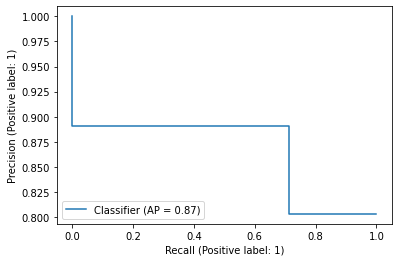

In [1187]:
#PRC works even if there is an unbalance. AUC was found to be 0.87 across all the thresholds which was very good. 
PrecisionRecallDisplay.from_predictions(y_test, test_predictions)

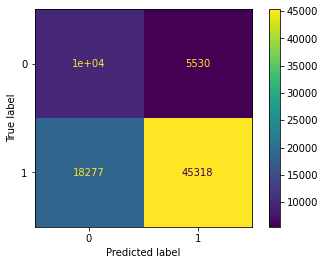

In [1188]:
# We can see that our type2 error is very high as compared to type 1 error. We might lose good customers, but will not be at
# a loss by giving loans to non credit worthy customers
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)